In [2]:
%load_ext autoreload
# %autoreload 2

In [6]:
import logging
from sys import stdout
from datetime import datetime
import os

logging.basicConfig(
    level=logging.INFO,
    format=f"[%(asctime)s][%(levelname)s][{os.environ.get('USERNAME')}] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np


# ####################################################################
def gauss_jacobi(A: np.ndarray, b: np.ndarray, x: np.ndarray, tol: float = 1e-5, max_iter: int = 5) -> np.ndarray:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Jacobi.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x, np.ndarray):
        x = np.array(x, dtype=float, ndmin=2).T
    assert x.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter + 1):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new
        x = x_new.copy()
    logging.info(f"i= {k} x: {x_new.T}")

    return x

[02-09 18:24:28][INFO][pc] 2026-02-09 18:24:28.575244


In [ ]:
# ####################################################################
def gauss_seidel(A: np.ndarray, b: np.ndarray, x: np.ndarray, tol: float = 1e-5, max_iter: int = 5) -> np.ndarray:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Gauss-Seidel.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x, np.ndarray):
        x = np.array(x, dtype=float, ndmin=2).T
    assert x.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    xy = np.zeros((max_iter + 1, n))
    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter + 1):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x_new[j] for j in range(i) if j != i]) + sum(
                [A[i, j] * x[j] for j in range(i, n) if j != i]
            )
            x_new[i] = (b[i] - suma) / A[i, i]
        if np.linalg.norm(x_new - x) < tol:
            return x_new

        x = x_new.copy()
        logging.info(f"i= {k} x: {x.T}")

    return x

# Ejercicio 1

In [35]:
%autoreload 2
A = [[2,1],[3,2]]
b = [5,8]
x0 = [0,0]

x_jacobi = gauss_jacobi(A, b, x0, tol=1e-6, max_iter=100)
print("Solución por Gauss-Jacobi:\n", x_jacobi)

x_seidel = gauss_seidel(A, b, x0, tol=1e-6, max_iter=12)
print("Solución por Gauss-Seidel:\n", x_seidel)


[02-09 18:54:55][INFO][pc] i= 0 x: [[0. 0.]]
[02-09 18:54:55][INFO][pc] i= 100 x: [[1.99999887 0.99999943]]
Solución por Gauss-Jacobi:
 [[1.99999887]
 [0.99999943]]
[02-09 18:54:55][INFO][pc] i= 0 x: [[0. 0.]]
[02-09 18:54:55][INFO][pc] i= 1 x: [[2.5  0.25]]


[02-09 18:54:55][INFO][pc] i= 2 x: [[2.375  0.4375]]
[02-09 18:54:55][INFO][pc] i= 3 x: [[2.28125  0.578125]]
[02-09 18:54:55][INFO][pc] i= 4 x: [[2.2109375  0.68359375]]
[02-09 18:54:55][INFO][pc] i= 5 x: [[2.15820312 0.76269531]]
[02-09 18:54:55][INFO][pc] i= 6 x: [[2.11865234 0.82202148]]
[02-09 18:54:55][INFO][pc] i= 7 x: [[2.08898926 0.86651611]]
[02-09 18:54:55][INFO][pc] i= 8 x: [[2.06674194 0.89988708]]
[02-09 18:54:55][INFO][pc] i= 9 x: [[2.05005646 0.92491531]]
[02-09 18:54:55][INFO][pc] i= 10 x: [[2.03754234 0.94368649]]
[02-09 18:54:55][INFO][pc] i= 11 x: [[2.02815676 0.95776486]]
[02-09 18:54:55][INFO][pc] i= 12 x: [[2.02111757 0.96832365]]
Solución por Gauss-Seidel:
 [[2.02111757]
 [0.96832365]]


# Ejercicio 2

In [72]:
%autoreload 2

A = [[1,1],[-2,1]]
b = [6,0]
x0_j= [0,0]
x0_s = [0,4]
x_jacobi = gauss_jacobi(A, b, x0_j, tol=1e-6, max_iter=100)
print("Solución por Gauss-Jacobi:\n", x_jacobi)

x_seidel = gauss_seidel(A, b, x0_s, tol=1e-6, max_iter=10)
print("Solución por Gauss-Seidel:\n", x_seidel)

[02-09 19:40:22][INFO][pc] i= 0 x: [[0. 0.]]
[02-09 19:40:22][INFO][pc] i= 100 x: [[-2.25179981e+15 -4.50359963e+15]]
Solución por Gauss-Jacobi:
 [[-2.25179981e+15]
 [-4.50359963e+15]]
[02-09 19:40:22][INFO][pc] i= 0 x: [[0. 4.]]
[02-09 19:40:22][INFO][pc] i= 1 x: [[2. 4.]]
Solución por Gauss-Seidel:
 [[2.]
 [4.]]


# Código para dibujar

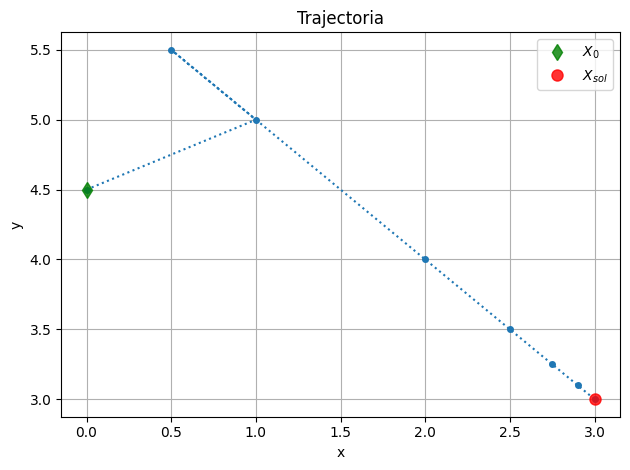

In [ ]:
# Extraer valores de la trayectoria
# -- Datos de ejemplo --
x_values = [0, 1, 0.5, 2, 2.5, 2.75, 2.9, 3.0]
y_values = [4.5, 5, 5.5, 4, 3.5, 3.25, 3.1, 3.0]

import matplotlib.pyplot as plt

iterations = range(len(x_values))

# Dibujar trajectoria en el espacio 2D
plt.plot(x_values, y_values, "o:", markersize=4)
plt.plot(x_values[0], y_values[0], "gd", markersize=8, label="$X_0$", alpha=0.8)
plt.plot(x_values[-1], y_values[-1], "ro", markersize=8, label="$X_{sol}$", alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectoria")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Ejercicio 1

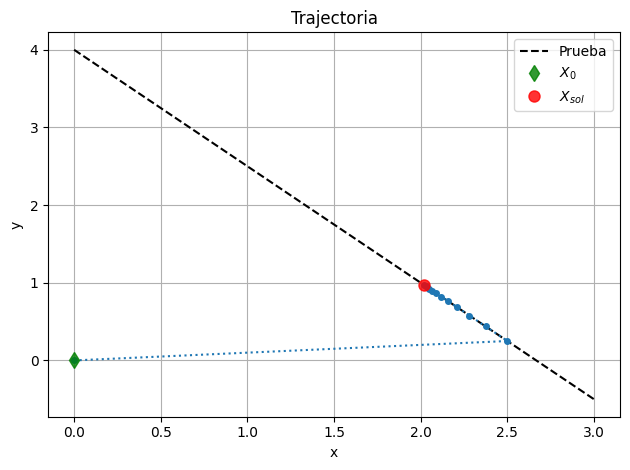

In [49]:
datos =[[0., 0.],[2.5,  0.25],
        [2.375 , 0.4375],[2.28125 , 0.578125],
        [2.2109375,  0.68359375],[2.15820312, 0.76269531],
        [2.11865234, 0.82202148],[2.08898926, 0.86651611],
        [2.06674194, 0.89988708],[2.05005646, 0.92491531],
        [2.03754234, 0.94368649],[2.02815676, 0.95776486],
        [2.02111757, 0.96832365]]

x_values= [datos[i][0] for i in range(len(datos))]
y_values = [datos[i][1] for i in range(len(datos))]

import matplotlib.pyplot as plt

def y_func(x):
    return -3/2 *x + 8/2

x_def = np.linspace(0, 3, 100)
y_def = y_func(x_def)
plt.plot(x_def, y_def, "k--", label="Prueba")

iterations = range(len(x_values))

# Dibujar trajectoria en el espacio 2D
plt.plot(x_values, y_values, "o:", markersize=4)
plt.plot(x_values[0], y_values[0], "gd", markersize=8, label="$X_0$", alpha=0.8)
plt.plot(x_values[-1], y_values[-1], "ro", markersize=8, label="$X_{sol}$", alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectoria")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()